In [ ]:
!pip install calplot
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8115 sha256=c74fa3b1186cf73a034a3e30dc7c74547d16f8a26f8385a1298ef2726a474adf
  Stored in directory: /root/.cache/pip/wheels/77/75/32/a518a4a1421776a93e1ede33cb8dac474095bf31fed7e4e22c
Successfully built calplot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.3 MB/s eta 0:00:00


In [ ]:
import os
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import calplot

from matplotlib.dates import HourLocator, DateFormatter,DayLocator,MonthLocator

from pandas import read_csv
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

from pmdarima.arima import ADFTest

from sklearn.metrics import mean_squared_error


In [ ]:
meter = read_csv("2021-all-meter.csv")
dup = read_csv("dup.csv")
event = read_csv("event_dates.csv")

meter = meter.loc[:, ~meter.columns.str.contains('^Unnamed')]

In [ ]:
display(meter)

,AMI Meter ID,date,16335457,18762999,230156289,56068032,56073008,56210792,56464971,66675284,...,98828750,98923621,98923641,98923648,98923655,98923661,98923662,98923663,Residential,Total
0,2021-03-21 00:00:00,2021-03-21 00:30:00,104.192,28.649,46.68,13.104,9.195,373.44,19.656,5.491,...,20.640,0.324,15.228,16.212,47.430,51.60,16.35,21.624,67808.216,71482.267
1,2021-03-21 00:30:00,2021-03-21 01:00:00,104.848,28.578,51.60,15.728,9.810,373.44,20.640,6.278,...,21.624,0.324,14.736,15.228,39.198,46.68,16.35,17.688,67808.216,71395.502
2,2021-03-21 01:00:00,2021-03-21 01:30:00,106.160,29.929,55.29,14.416,8.580,375.96,19.656,7.853,...,9.338,0.160,15.228,14.244,40.976,44.22,14.30,18.180,68586.253,72266.724
3,2021-03-21 01:30:00,2021-03-21 02:00:00,104.192,29.488,50.37,16.384,11.040,378.36,18.672,6.278,...,9.418,0.324,14.736,14.244,42.165,44.22,16.35,16.704,68586.253,72069.140
4,2021-03-21 02:00:00,2021-03-21 02:30:00,104.192,28.645,52.83,15.728,12.270,375.96,20.640,4.704,...,8.928,0.324,15.228,16.212,50.782,46.68,18.40,18.180,71152.560,74632.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,2021-09-27 21:30:00,2021-09-27 22:00:00,104.192,22.003,11.04,14.416,13.422,766.68,24.084,3.917,...,21.624,0.488,42.264,26.040,28.374,88.44,18.40,22.116,72763.262,76780.806
8396,2021-09-27 22:00:00,2021-09-27 22:30:00,104.192,22.214,9.81,11.136,12.476,727.44,22.608,3.917,...,21.132,0.324,40.296,22.608,29.898,88.44,16.35,20.148,61979.926,65924.937
8397,2021-09-27 22:30:00,2021-09-27 23:00:00,104.192,22.598,11.04,10.480,10.888,604.56,23.592,3.130,...,16.704,0.324,38.820,21.132,27.843,85.98,16.35,20.148,61979.926,65741.525
8398,2021-09-27 23:00:00,2021-09-27 23:30:00,104.192,22.598,9.81,7.856,9.106,668.40,20.148,3.130,...,15.720,0.488,35.880,15.720,24.676,85.98,14.30,19.656,51223.651,54984.815


In [ ]:
display(dup)

,Unnamed: 0,0
0,11419,False
1,11420,False
2,11421,False
3,11422,False
4,11423,False
...,...,...
15262,11414,False
15263,11415,False
15264,11416,False
15265,11417,False


In [ ]:
display(event)

,start,end
0,3/29/2021 7:00,3/29/2021 7:30
1,3/29/2021 7:30,3/29/2021 8:00
2,5/25/2021 17:00,5/25/2021 17:30
3,5/25/2021 17:30,5/25/2021 18:00
4,6/14/2021 16:00,6/14/2021 16:30
5,6/14/2021 16:30,6/14/2021 17:00
6,7/29/2021 14:00,7/29/2021 14:30
7,7/29/2021 14:30,7/29/2021 15:00
8,11/23/2021 7:00,11/23/2021 7:30
9,11/23/2021 7:30,11/23/2021 8:00


In [ ]:
meter.shape

(8400, 55)

In [ ]:
meter.isnull().sum()

AMI Meter ID    0
date            0
16335457        0
18762999        0
230156289       0
56068032        0
56073008        0
56210792        0
56464971        0
66675284        0
66676872        0
66735042        0
82458402        0
82458430        0
82458528        0
82458535        0
82458544        0
83425325        0
83425950        0
83425960        0
83426095        0
83692447        0
83692449        0
83692455        0
83692461        0
83692509        0
83692538        0
83693653        0
83693711        0
83694184        0
83761529        0
83761545        0
95282692        0
96186888        0
96186904        0
96375911        0
98569140        0
98790323        0
98790342        0
98828727        0
98828741        0
98828744        0
98828745        0
98828746        0
98828748        0
98828750        0
98923621        0
98923641        0
98923648        0
98923655        0
98923661        0
98923662        0
98923663        0
Residential     0
Total           0
dtype: int

,date
0,2021-06-28 00:00:00
1,2021-06-28 00:30:00
2,2021-06-28 01:00:00
3,2021-06-28 01:30:00
4,2021-06-28 02:00:00
...,...
1291,2021-07-24 21:30:00
1292,2021-07-24 22:00:00
1293,2021-07-24 22:30:00
1294,2021-07-24 23:00:00


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2021'>], dtype=object))

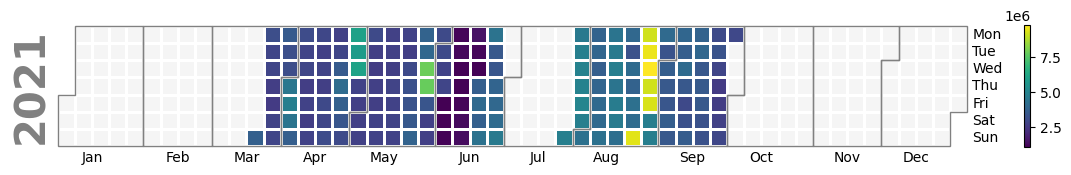

In [ ]:
data = meter.copy()

data["AMI Meter ID"] = pd.to_datetime(data["AMI Meter ID"])
#data["AMI Meter ID"] = data["AMI Meter ID"].dt.date
my_range = pd.date_range('2021-03-21 00:00:00', '2021-09-27 23:30:00', freq = '30T')
missing = pd.DataFrame(my_range.difference(data['AMI Meter ID']))
my_range = pd.DataFrame(my_range)
my_range.columns = ["date"]
missing.columns = ["date"]
my_range['missing'] = my_range["date"].isin(missing["date"])#np.where(,True,False)
display(missing)
my_range.set_index("date")
data = data.set_index(["AMI Meter ID"])
#display(data)
calplot.calplot(data["Total"],dropzero=True)
#df.reindex(pd.date_range('2021-03-21 00:00:00', '2021-09-27 23:30:00', freq = '30T')).isnull().all(1)

In [ ]:
meter.describe()

,16335457,18762999,230156289,56068032,56073008,56210792,56464971,66675284,66676872,66735042,...,98828750,98923621,98923641,98923648,98923655,98923661,98923662,98923663,Residential,Total
count,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,...,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000
mean,106.196487,27.805862,22.726842,17.948985,18.340259,583.335092,30.269305,5.514981,28.697807,24.444597,...,38.845215,50.883839,36.121135,35.573537,38.551861,109.658104,30.899420,28.477258,66332.445244,70671.862296
std,21.881773,3.305747,12.048595,11.872471,12.278769,143.825932,13.617321,3.050563,17.306644,14.463141,...,35.371575,41.685634,29.927745,31.895834,24.560934,80.797493,28.732621,20.380106,28943.901861,29299.058826
min,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9522.646000,12051.448000
25%,102.880000,26.131000,13.500000,9.168000,10.157750,447.240000,20.148000,3.130000,16.380000,13.260000,...,14.244000,0.324000,15.228000,13.260000,24.982750,44.220000,12.250000,14.736000,48137.774750,52490.713000
50%,104.192000,27.733500,19.650000,13.760000,13.732000,599.640000,26.040000,4.704000,22.920000,21.132000,...,19.656000,77.332000,24.084000,18.672000,33.408000,81.060000,16.350000,19.656000,59644.975000,64000.725000
75%,106.160000,29.683000,28.260000,24.240000,23.131000,688.080000,35.388000,7.066000,34.400000,30.960000,...,59.964000,84.704000,49.152000,48.660000,48.454500,154.800000,43.000000,34.896000,81343.132000,86036.243250
max,196.608000,97.248000,90.930000,182.656000,134.527000,1126.560000,94.872000,21.216000,136.640000,88.464000,...,169.080000,122.060000,162.684000,183.336000,651.320000,389.946000,143.350000,118.452000,154448.956000,159503.909000


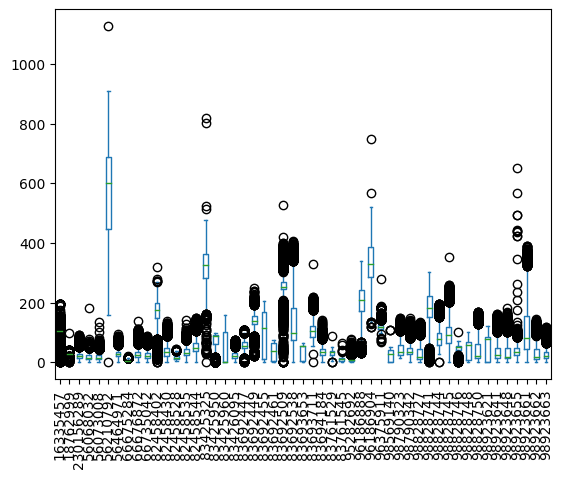

In [ ]:
meter.drop(["Residential","Total"],axis=1).plot(kind='box', subplots=False, layout=(60,1), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (36, 9)
plt.xticks(rotation=90)
plt.show()

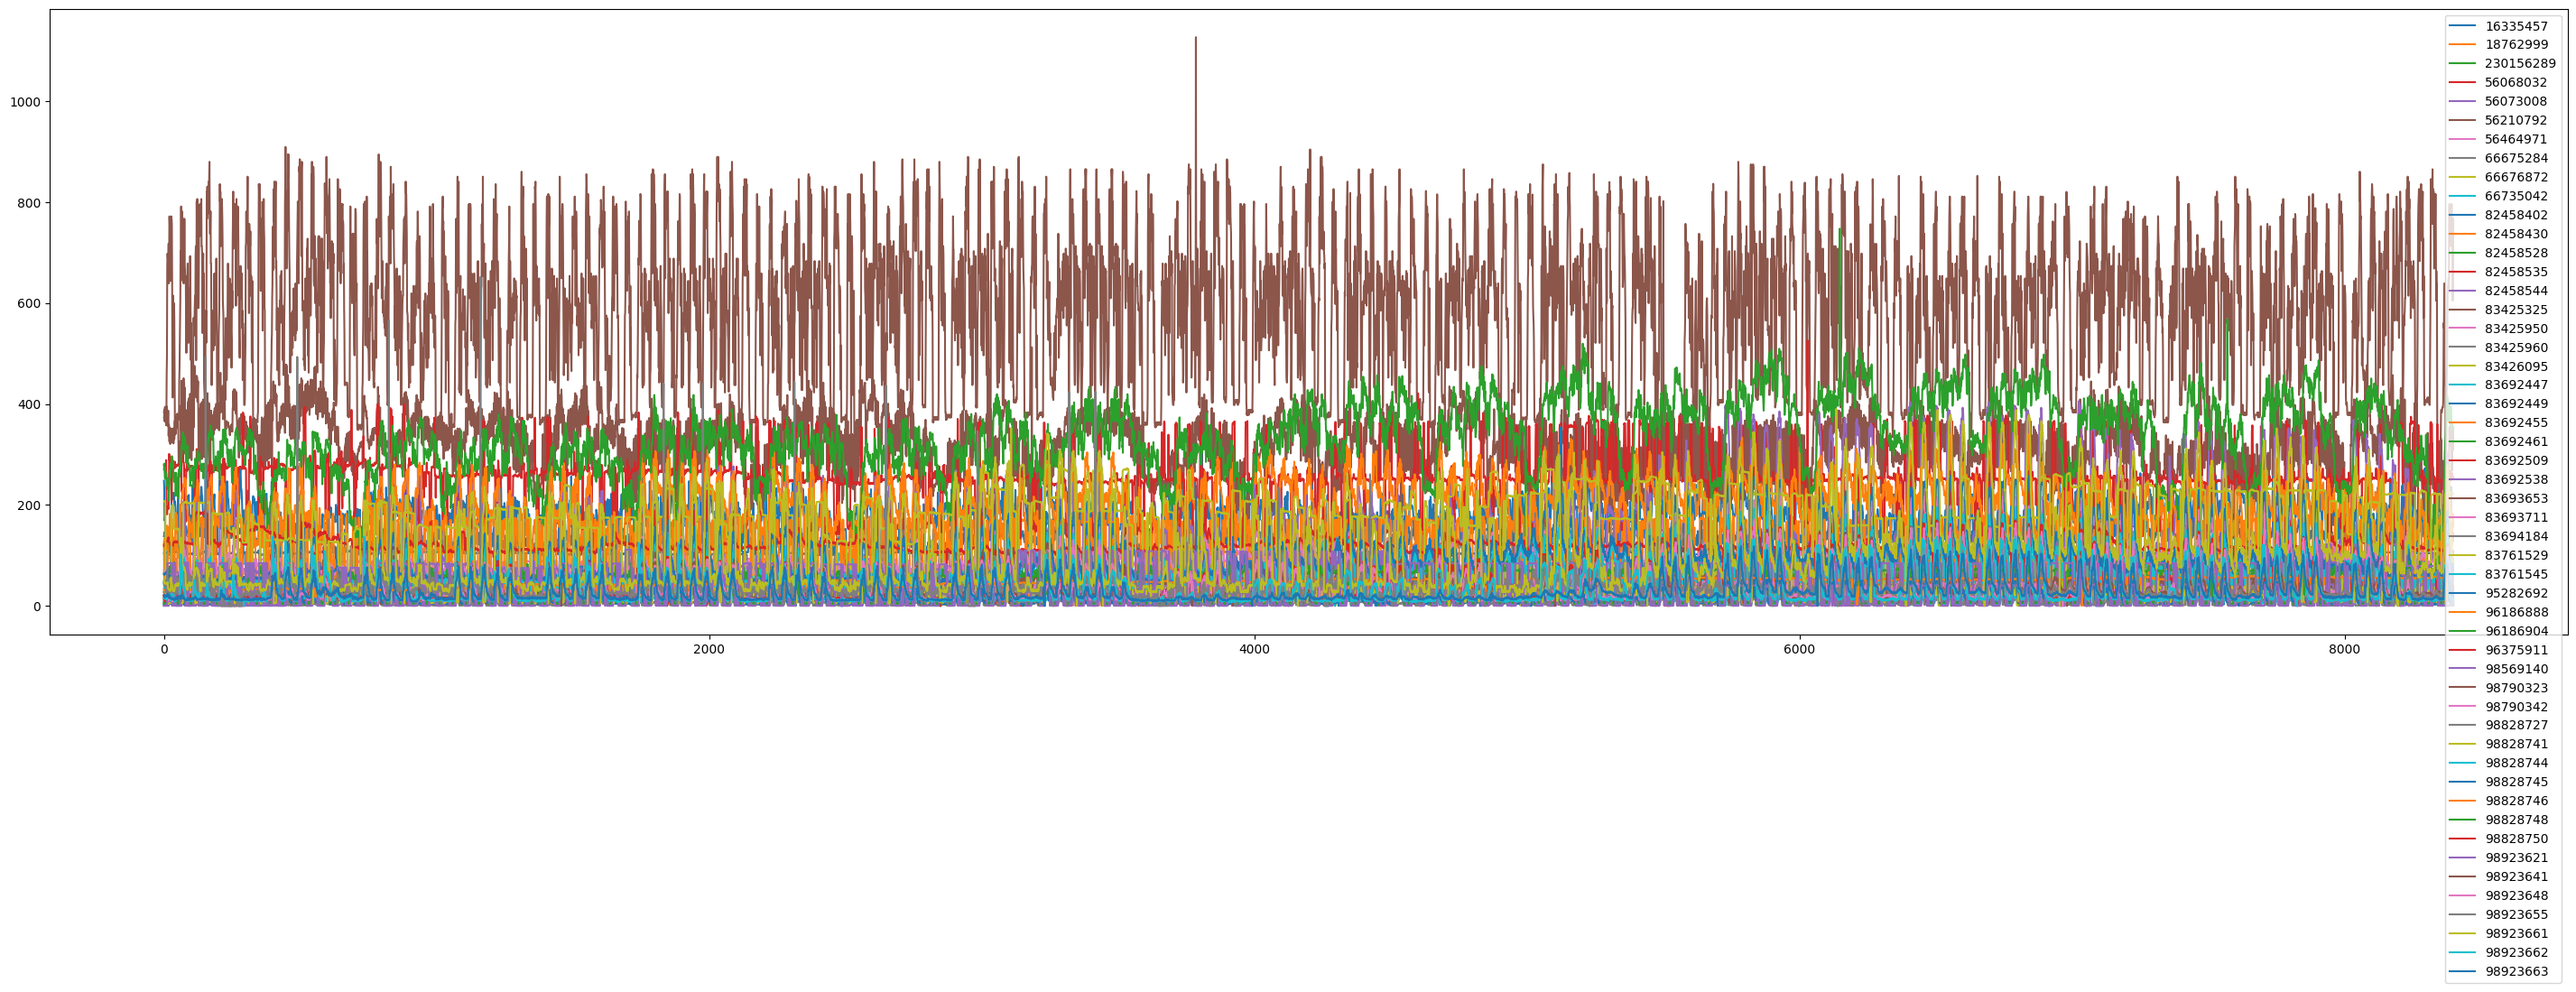

In [ ]:

meter.copy().drop(["Residential","Total"],axis=1).plot(kind='line', subplots=False, layout=(60,1), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (36, 9)
plt.show()

In [ ]:
residential_cor = meter.corr(numeric_only=True).abs()
residential_cor = pd.DataFrame(residential_cor["Residential"]).transpose()
display(residential_cor)

,16335457,18762999,230156289,56068032,56073008,56210792,56464971,66675284,66676872,66735042,...,98828750,98923621,98923641,98923648,98923655,98923661,98923662,98923663,Residential,Total
Residential,0.119302,0.203192,0.373232,0.474169,0.248909,0.038681,0.375602,0.481783,0.287452,0.363873,...,0.146704,0.269322,0.249926,0.23194,0.236222,0.304587,0.249236,0.291799,1.0,0.997304


In [ ]:
low_res_corelation = meter.copy().drop([column for column in residential_cor if (residential_cor.iloc[0][column] <= 0.10 or residential_cor.iloc[0][column] >= .99)],axis=1)
low_res_corelation = low_res_corelation.drop(["AMI Meter ID", "date"],axis = 1)
res_sum = pd.DataFrame(low_res_corelation.transpose().sum())
non_res_sum = pd.DataFrame(meter.copy().drop([column for column in residential_cor if (residential_cor.iloc[0][column] >= 0.10 or residential_cor.iloc[0][column] >= .99)],axis=1).drop(["AMI Meter ID", "date"],axis = 1).transpose().sum())
non_res_sum.columns = ["non_res_sum"]
res_sum.columns = ["Res_sum"]
total_sum = pd.DataFrame(meter.copy().drop(["AMI Meter ID", "date","Residential","Total"],axis = 1).transpose().sum())
total_sum.columns = ["total_sum"]

res_sum["Residential"] = meter["Residential"]
res_sum["Total"] = meter["Total"]
res_sum["total_sum"] = total_sum["total_sum"]
res_sum["non_res_sum"] = non_res_sum["non_res_sum"]
res_sum["res_to"] = res_sum["Total"] - res_sum["Residential"]
res_sum["AMI Meter ID"] = meter["AMI Meter ID"]

display(res_sum)

,Res_sum,Residential,Total,total_sum,non_res_sum,res_to,AMI Meter ID
0,2685.791,67808.216,71482.267,3353.589,667.798,3674.051,2021-03-21 00:00:00
1,2577.192,67808.216,71395.502,3243.554,666.362,3587.286,2021-03-21 00:30:00
2,2418.402,68586.253,72266.724,3099.388,680.986,3680.471,2021-03-21 01:00:00
3,2428.984,68586.253,72069.140,3104.298,675.314,3482.887,2021-03-21 01:30:00
4,2441.255,71152.560,74632.641,3109.781,668.526,3480.081,2021-03-21 02:00:00
...,...,...,...,...,...,...,...
8395,2993.348,72763.262,76780.806,4017.546,1024.198,4017.544,2021-09-27 21:30:00
8396,2956.510,61979.926,65924.937,3945.010,988.500,3945.011,2021-09-27 22:00:00
8397,2880.935,61979.926,65741.525,3761.598,880.663,3761.599,2021-09-27 22:30:00
8398,2816.273,51223.651,54984.815,3761.165,944.892,3761.164,2021-09-27 23:00:00


<Axes: xlabel='dates'>

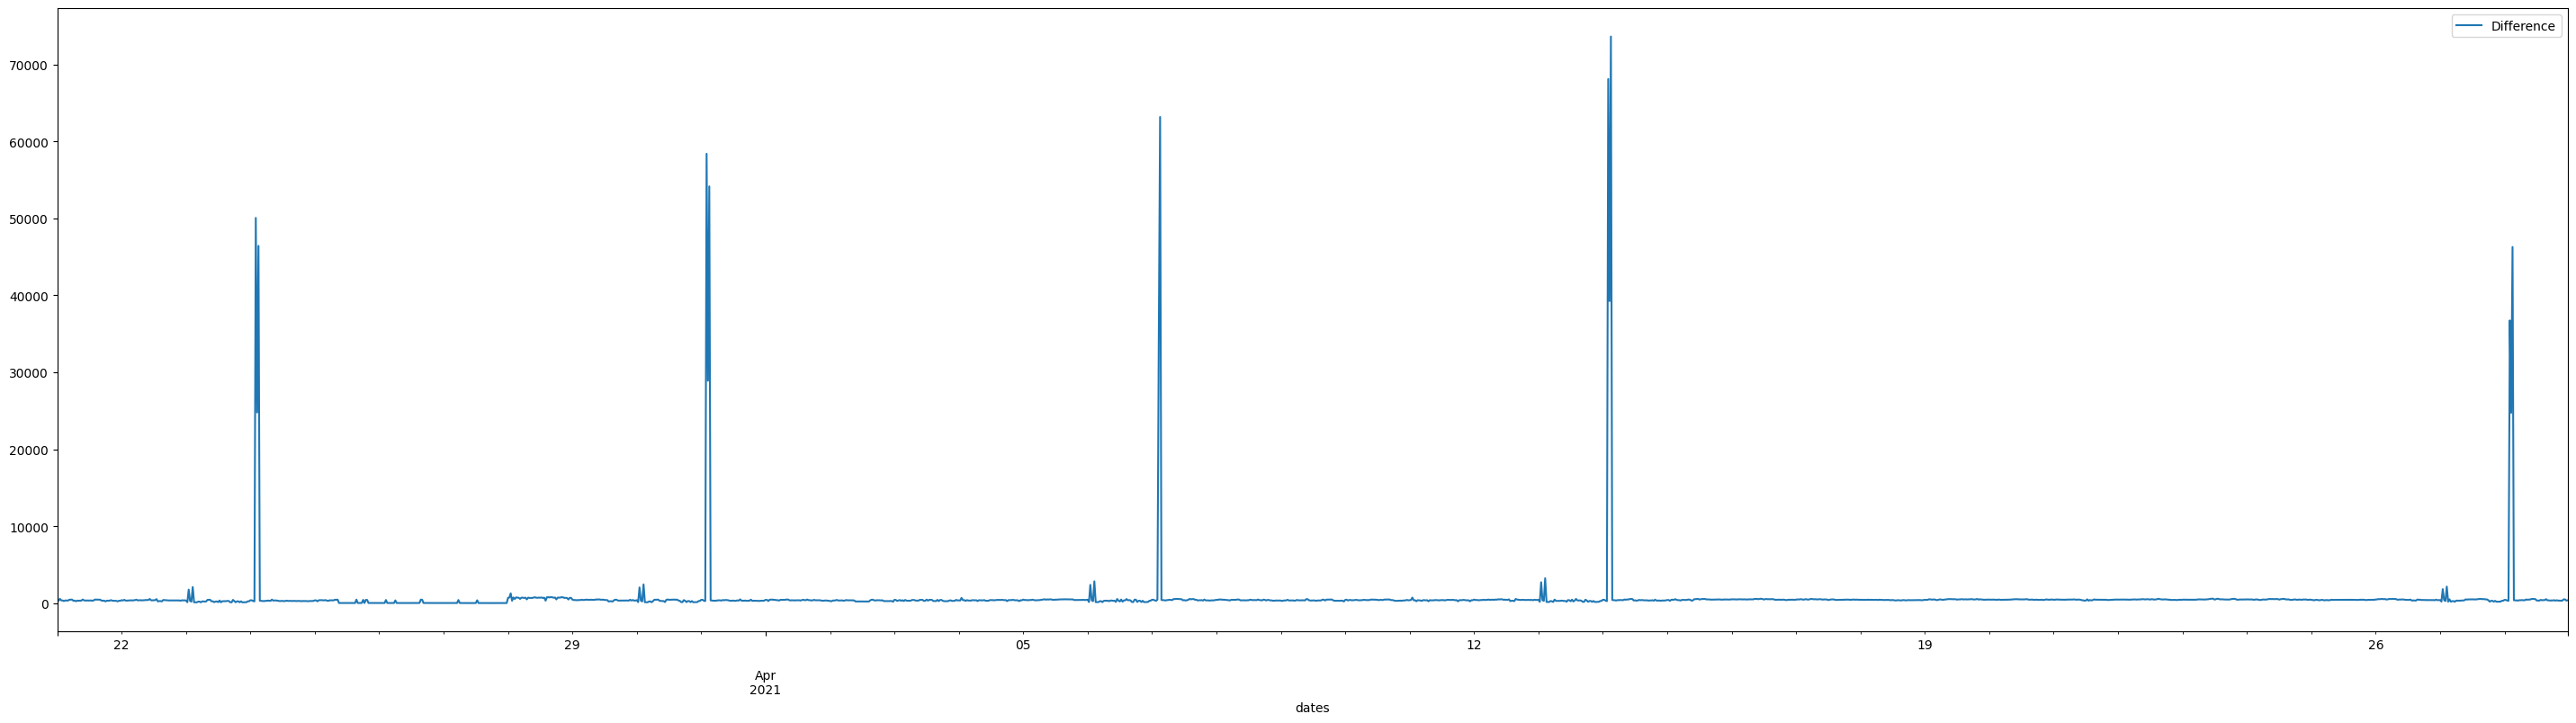

In [ ]:
my_ra = pd.DataFrame(pd.date_range('2021-03-21 00:00:00', '2021-09-27 23:30:00', freq = '30T'))
my_ra.columns = ["dates"]
res_sum["AMI Meter ID"] = pd.to_datetime(res_sum["AMI Meter ID"])
my_ra = my_ra.merge(res_sum,how="left", left_on = "dates",right_on="AMI Meter ID").drop(["AMI Meter ID","non_res_sum","Total","Residential","Res_sum"], axis = 1)
my_ra["Difference"] = my_ra["res_to"] - my_ra["total_sum"]

filter = my_ra["Difference"] > 1
my_ra.where(filter).dropna(axis=0).plot(x = "dates",y="Difference",kind='line', subplots=False, sharex=True, sharey=True)

In [ ]:
filter = my_ra["Difference"] > 10000
getDates = my_ra.where(filter).dropna(axis=0)
copy = meter.copy()
copy["AMI Meter ID"] = pd.to_datetime(copy["AMI Meter ID"])
getDates = getDates.merge(copy, how = "inner", left_on="dates",right_on = "AMI Meter ID")
display(getDates)

,dates,total_sum,res_to,Difference,AMI Meter ID,date,16335457,18762999,230156289,56068032,...,98828750,98923621,98923641,98923648,98923655,98923661,98923662,98923663,Residential,Total
0,2021-03-24 02:00:00,3180.731,53238.151,50057.420,2021-03-24 02:00:00,2021-03-24 02:30:00,107.472,28.682,28.26,9.168,...,16.704,0.324,14.244,11.304,20.960,39.30,10.20,13.260,42189.223,95427.374
1,2021-03-24 02:30:00,3183.772,27974.370,24790.598,2021-03-24 02:30:00,2021-03-24 03:00:00,107.472,28.225,30.72,9.824,...,18.180,0.160,15.228,13.260,40.644,41.76,12.25,14.736,42189.223,70163.593
2,2021-03-24 03:00:00,3195.286,49619.926,46424.640,2021-03-24 03:00:00,2021-03-24 03:30:00,106.816,28.574,29.49,10.480,...,16.704,0.324,15.228,12.288,40.449,41.76,12.25,12.288,42550.295,92170.221
3,2021-03-31 02:00:00,3144.495,61533.347,58388.852,2021-03-31 02:00:00,2021-03-31 02:30:00,103.536,25.747,19.65,5.888,...,14.244,0.324,16.212,12.288,36.201,46.68,12.25,11.796,35399.146,96932.493
4,2021-03-31 02:30:00,3330.736,32243.269,28912.533,2021-03-31 02:30:00,2021-03-31 03:00:00,104.192,25.747,22.11,5.888,...,15.228,0.324,16.212,12.768,40.644,58.98,10.20,12.768,35399.146,67642.415
5,2021-03-31 03:00:00,3300.006,57452.250,54152.244,2021-03-31 03:00:00,2021-03-31 03:30:00,103.536,26.726,20.88,5.888,...,13.752,0.324,16.212,12.768,40.449,46.68,12.25,12.288,35092.517,92544.767
6,2021-04-07 02:30:00,2647.366,36372.644,33725.278,2021-04-07 02:30:00,2021-04-07 03:00:00,106.816,23.578,18.42,5.888,...,15.228,0.324,16.212,12.768,38.281,54.06,10.20,11.796,34777.540,71150.184
7,2021-04-07 03:00:00,2647.726,65817.698,63169.972,2021-04-07 03:00:00,2021-04-07 03:30:00,106.160,23.981,19.65,5.232,...,15.228,0.324,17.196,12.768,38.056,49.14,12.25,10.812,35326.629,101144.327
8,2021-04-14 02:00:00,3077.592,71175.785,68098.193,2021-04-14 02:00:00,2021-04-14 02:30:00,104.192,28.301,15.96,5.232,...,14.244,0.324,26.532,13.260,28.404,58.98,14.30,13.752,34625.556,105801.341
9,2021-04-14 02:30:00,3072.882,42325.595,39252.713,2021-04-14 02:30:00,2021-04-14 03:00:00,104.848,29.280,17.19,5.888,...,15.228,0.160,24.084,12.768,35.685,56.52,10.20,13.260,34625.556,76951.151


#Missing Values

## Null Values

no null values were present in the data.

## Missing Dates

We have a range of dates missing:
starting from 6/28/2021 and ending on 7/24/2021

## Missing Meters

The Total is greater then the combined meters for only a portion of the data, meaning it is accounting for more meters then we recieved.

Specificly it should be accounting for more Industural meters, as long as we assume the residental total is correct.

# Extra Test Trash

In [ ]:
event["start"] = pd.to_datetime(event["start"])
event["end"] = pd.to_datetime(event["end"])
merge_meter = meter.copy()
merge_meter["start"] = pd.to_datetime(merge_meter["AMI Meter ID"])
dis = merge_meter.merge(event,how="left", left_on="start",right_on="start").dropna(axis=0)
dis

,AMI Meter ID,date,16335457,18762999,230156289,56068032,56073008,56210792,56464971,66675284,...,98923641,98923648,98923655,98923661,98923662,98923663,Residential,Total,start,end
398,2021-03-29 07:00:00,2021-03-29 07:30:00,108.128,28.520,67.560,27.520,15.140,638.100,31.944,11.002,...,107.640,82.572,44.888,167.100,135.150,55.536,106113.755,111543.214,2021-03-29 07:00:00,2021-03-29 07:30:00
399,2021-03-29 07:30:00,2021-03-29 08:00:00,108.784,28.614,71.250,28.832,19.235,751.140,35.880,10.214,...,95.844,86.016,50.948,167.100,137.200,49.632,106113.755,111692.278,2021-03-29 07:30:00,2021-03-29 08:00:00
3298,2021-05-25 17:00:00,2021-05-25 17:30:00,100.912,28.026,28.260,31.456,25.840,683.160,34.896,7.066,...,47.184,50.124,43.909,98.280,43.000,38.328,122638.353,127579.722,2021-05-25 17:00:00,2021-05-25 17:30:00
3299,2021-05-25 17:30:00,2021-05-25 18:00:00,99.600,27.774,25.800,26.864,23.558,653.640,34.404,7.853,...,42.264,43.248,43.835,81.060,38.900,38.328,122638.353,127427.778,2021-05-25 17:30:00,2021-05-25 18:00:00
4352,2021-06-14 16:00:00,2021-06-14 16:30:00,148.752,29.095,36.840,41.079,20.880,581.625,34.896,8.640,...,56.520,70.776,66.832,186.720,63.450,20.148,39177.880,45119.273,2021-06-14 16:00:00,2021-06-14 16:30:00
4353,2021-06-14 16:30:00,2021-06-14 17:00:00,146.800,28.747,35.610,34.707,20.880,549.621,37.344,7.853,...,53.568,46.692,57.277,172.020,63.450,20.640,39177.880,44288.438,2021-06-14 16:30:00,2021-06-14 17:00:00
5212,2021-07-29 14:00:00,2021-07-29 14:30:00,150.720,32.138,39.476,37.269,40.409,531.354,44.862,1.978,...,93.445,91.346,64.931,284.956,89.572,42.756,132991.305,138596.605,2021-07-29 14:00:00,2021-07-29 14:30:00
5213,2021-07-29 14:30:00,2021-07-29 15:00:00,150.064,31.795,41.016,34.990,37.471,556.157,44.483,1.866,...,87.897,89.178,67.252,286.271,91.302,45.708,132991.305,138706.192,2021-07-29 14:30:00,2021-07-29 15:00:00


([<matplotlib.axis.XTick at 0x7ef91429ce80>,
 [Text(18835.5, 0, '2021-07-27'),
  Text(18835.520833333332, 0, '2021-07-27'),
  Text(18835.541666666668, 0, '2021-07-27'),
  Text(18835.5625, 0, '2021-07-27'),
  Text(18835.583333333332, 0, '2021-07-27'),
  Text(18835.604166666668, 0, '2021-07-27'),
  Text(18835.625, 0, '2021-07-27'),
  Text(18835.645833333332, 0, '2021-07-27'),
  Text(18835.666666666668, 0, '2021-07-27'),
  Text(18835.6875, 0, '2021-07-27'),
  Text(18835.708333333332, 0, '2021-07-27'),
  Text(18835.729166666668, 0, '2021-07-27'),
  Text(18835.75, 0, '2021-07-27'),
  Text(18835.770833333332, 0, '2021-07-27'),
  Text(18835.791666666668, 0, '2021-07-27'),
  Text(18835.8125, 0, '2021-07-27'),
  Text(18835.833333333332, 0, '2021-07-27'),
  Text(18835.854166666668, 0, '2021-07-27'),
  Text(18835.875, 0, '2021-07-27'),
  Text(18835.895833333332, 0, '2021-07-27'),
  Text(18835.916666666668, 0, '2021-07-27'),
  Text(18835.9375, 0, '2021-07-27'),
  Text(18835.958333333332, 0, '2021-

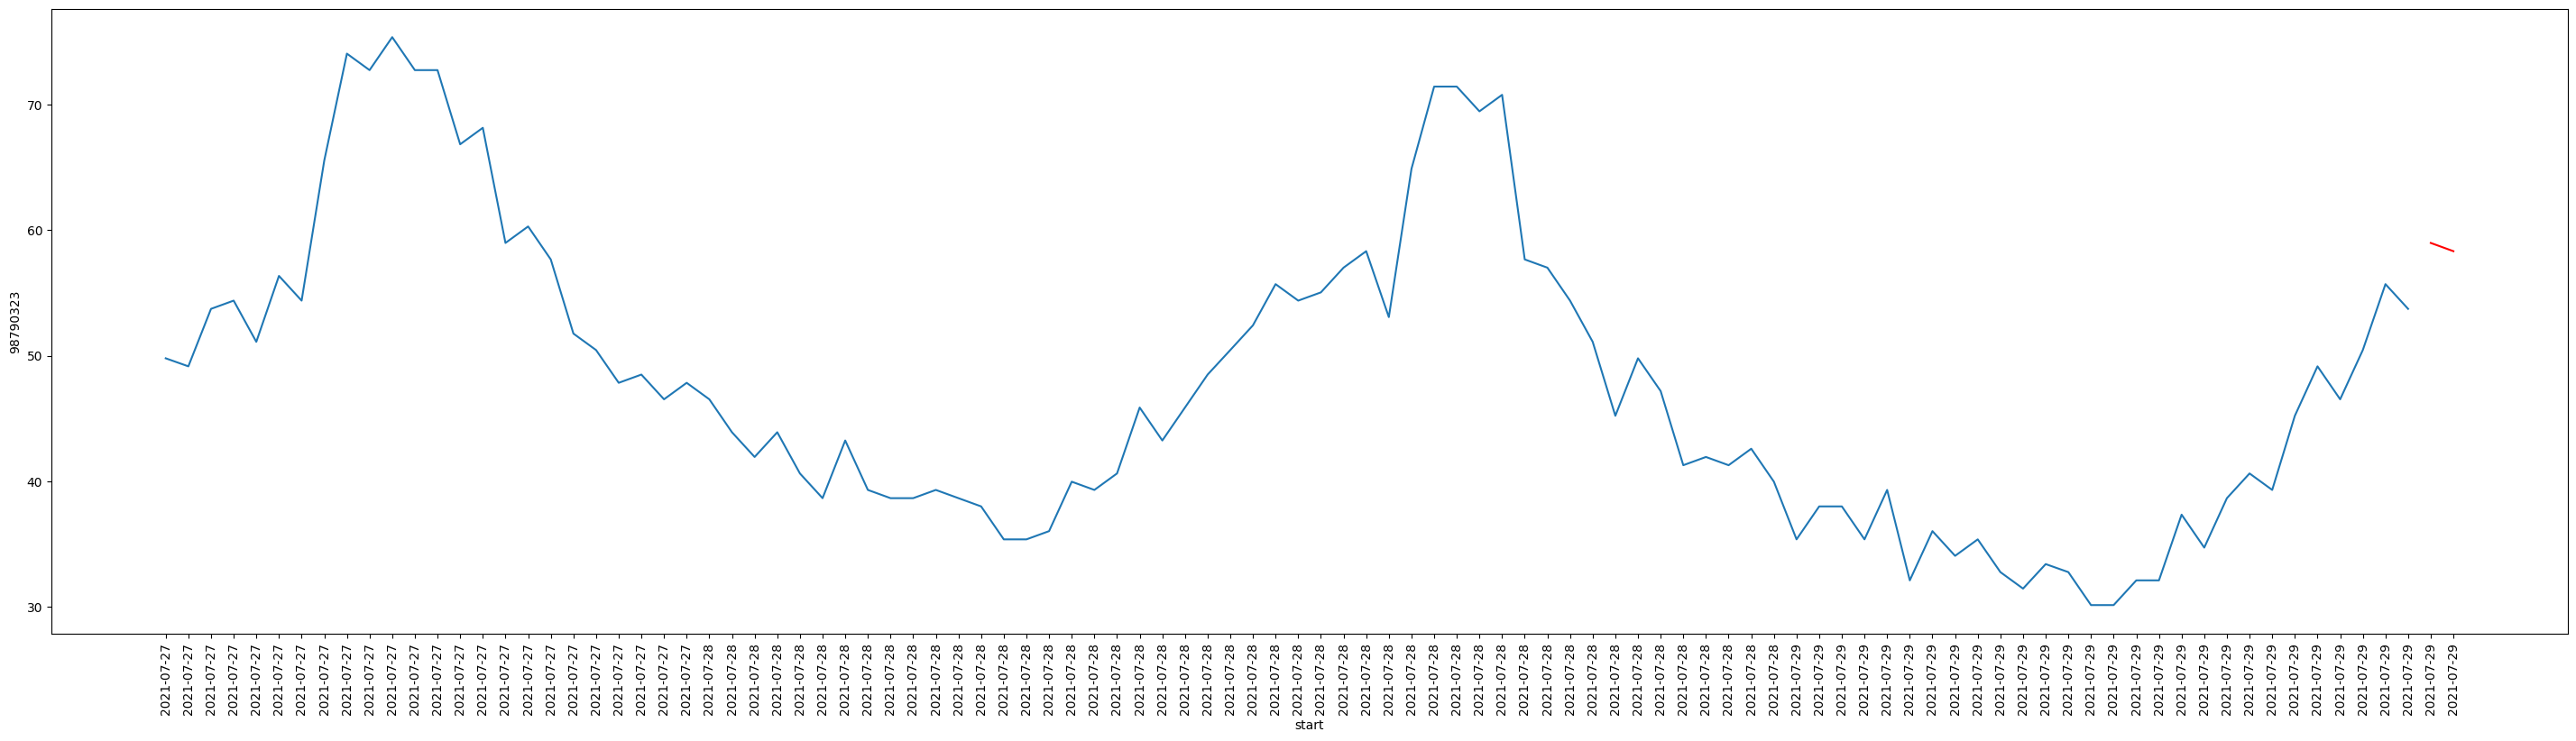

In [ ]:
range_end = 5212
range_start = range_end - 100
prediction_end = range_end + 2
meter_name = '98790323'
train = merge_meter[meter_name][range_start:range_end]
train_date = merge_meter["start"][range_start:range_end]
test = merge_meter[meter_name][range_end:prediction_end]
test_date = merge_meter["start"][range_end:prediction_end]
plot = sns.lineplot(y= train,x=train_date)
plt.plot(test_date,test,color = "r")
plt.xticks(merge_meter["start"][range_start:prediction_end],rotation = 90)

In [ ]:
arima_model = auto_arima(train, start_p=0, start_q=0,
                        test='adf',       # use adftest to find optimal 'd'
                        max_p=5, max_q=5, # maximum p and q
                        m=1,              # frequency of series 2* 24 for 30 minutes
                        d=0,           # let model determine 'd'
                        seasonal=False,   # No Seasonality
                        start_P=0,
                        D=0,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1064.668, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=940.653, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=562.310, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=563.890, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=560.340, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=844.306, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=558.454, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=559.088, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=558.870, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=556.889, Time=0.47 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=558.864, Time=0.57 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=1.15 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=560.558, Time=0.

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 0, 3)   Log Likelihood                -269.626
Date:                Wed, 30 Aug 2023   AIC                            551.252
Time:                        19:47:50   BIC                            566.883
Sample:                             0   HQIC                           557.578
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4656      2.559      1.745      0.081      -0.550       9.482
ar.L1          0.9076      0.049     18.713      0.000       0.813       1.003
ma.L1         -0.0819      0.082     -0.996      0.319      -0.243       0.079
ma.L2          0.2221      0.102      2.181      0.029       0.023       0.422
ma.L3          0.2578      0.115      2.243      0.025       0.033       0.483
sigma2        12.5331      1.509      8.307      0.000       9.576      15.490
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                19.49
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.51
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_model.fit(train)

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True)

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 100), index = test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
5212,54.797932
5213,55.425113


([<matplotlib.axis.XTick at 0x7ef91409ed40>,
 [Text(18837.583333333332, 0, '2021-07-29'),
  Text(18837.604166666668, 0, '2021-07-29')])

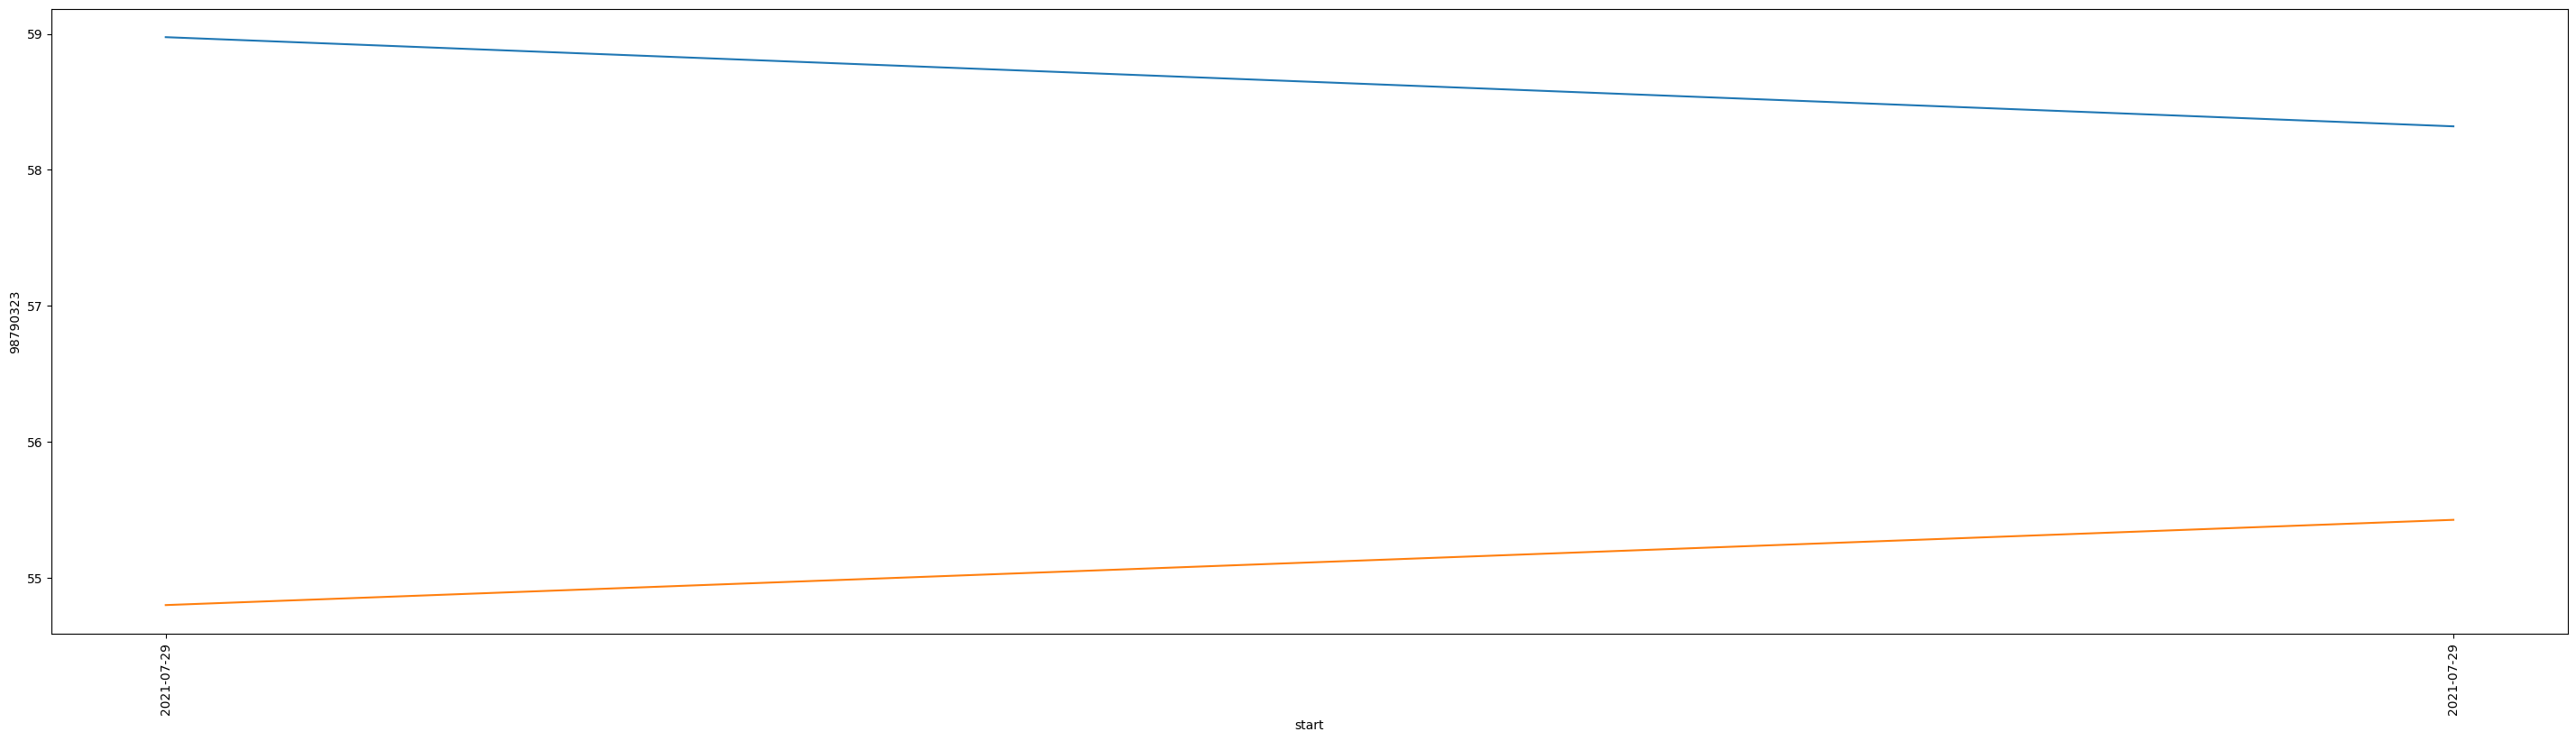

In [ ]:
plot2 = sns.lineplot(y=test,x=test_date)
plt.plot(test_date,prediction)
plt.xticks(merge_meter["start"][range_end:prediction_end],rotation = 90)

In [ ]:
valdata = prediction.copy()
valdata["test"] = test
valdata

,predicted_sales,test
5212,54.797932,58.976
5213,55.425113,58.320


<Axes: xlabel='test', ylabel='predicted_sales'>

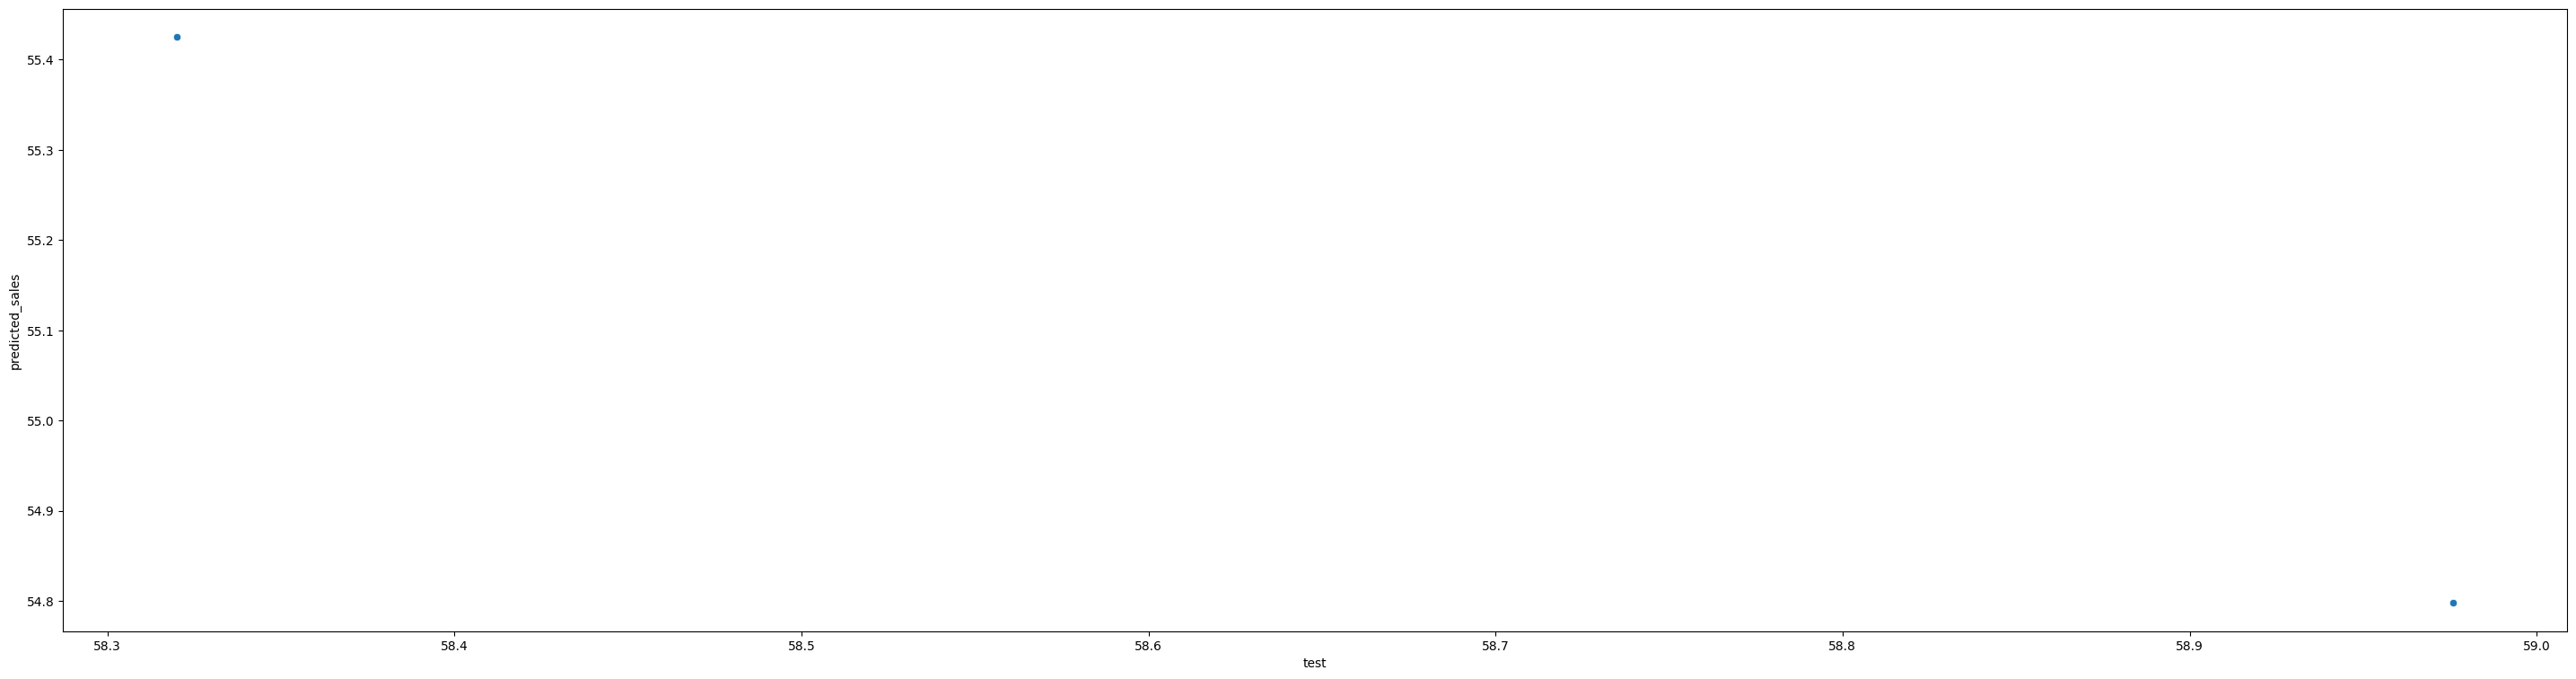

In [ ]:
sns.scatterplot(valdata,y="predicted_sales", x="test")

In [ ]:
mean_squared_error(valdata["predicted_sales"], valdata["test"])

12.918313129186684

In [ ]:
cor_matrix = meter.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
lower_tri = cor_matrix.where(np.tril(np.ones(cor_matrix.shape),k=-1).astype(np.bool))
to_drop_low = [column for column in upper_tri.columns if (not(any(upper_tri[column] >= 0.70) and any(lower_tri[column] >= 0.70)))]
to_drop_high = [column for column in upper_tri.columns if (any(upper_tri[column] >= 0.70) and any(lower_tri[column] >= 0.70))]
to_drop_high

<ipython-input-38-a848f8461bf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = meter.corr().abs()
<ipython-input-38-a848f8461bf6>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
<ipython-input-38-a848f8461bf6>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you speci

['56073008',
 '56464971',
 '66675284',
 '66676872',
 '66735042',
 '82458430',
 '82458528',
 '82458535',
 '82458544',
 '83426095',
 '83692538',
 '83693711',
 '83694184',
 '95282692',
 '98790323',
 '98790342',
 '98828727',
 '98828744',
 '98828745',
 '98828750',
 '98923641',
 '98923648',
 '98923661',
 '98923662']

<ipython-input-39-c2e111bf0a69>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(meter.drop(to_drop_high,axis=1).corr(),annot=True)


<Axes: >

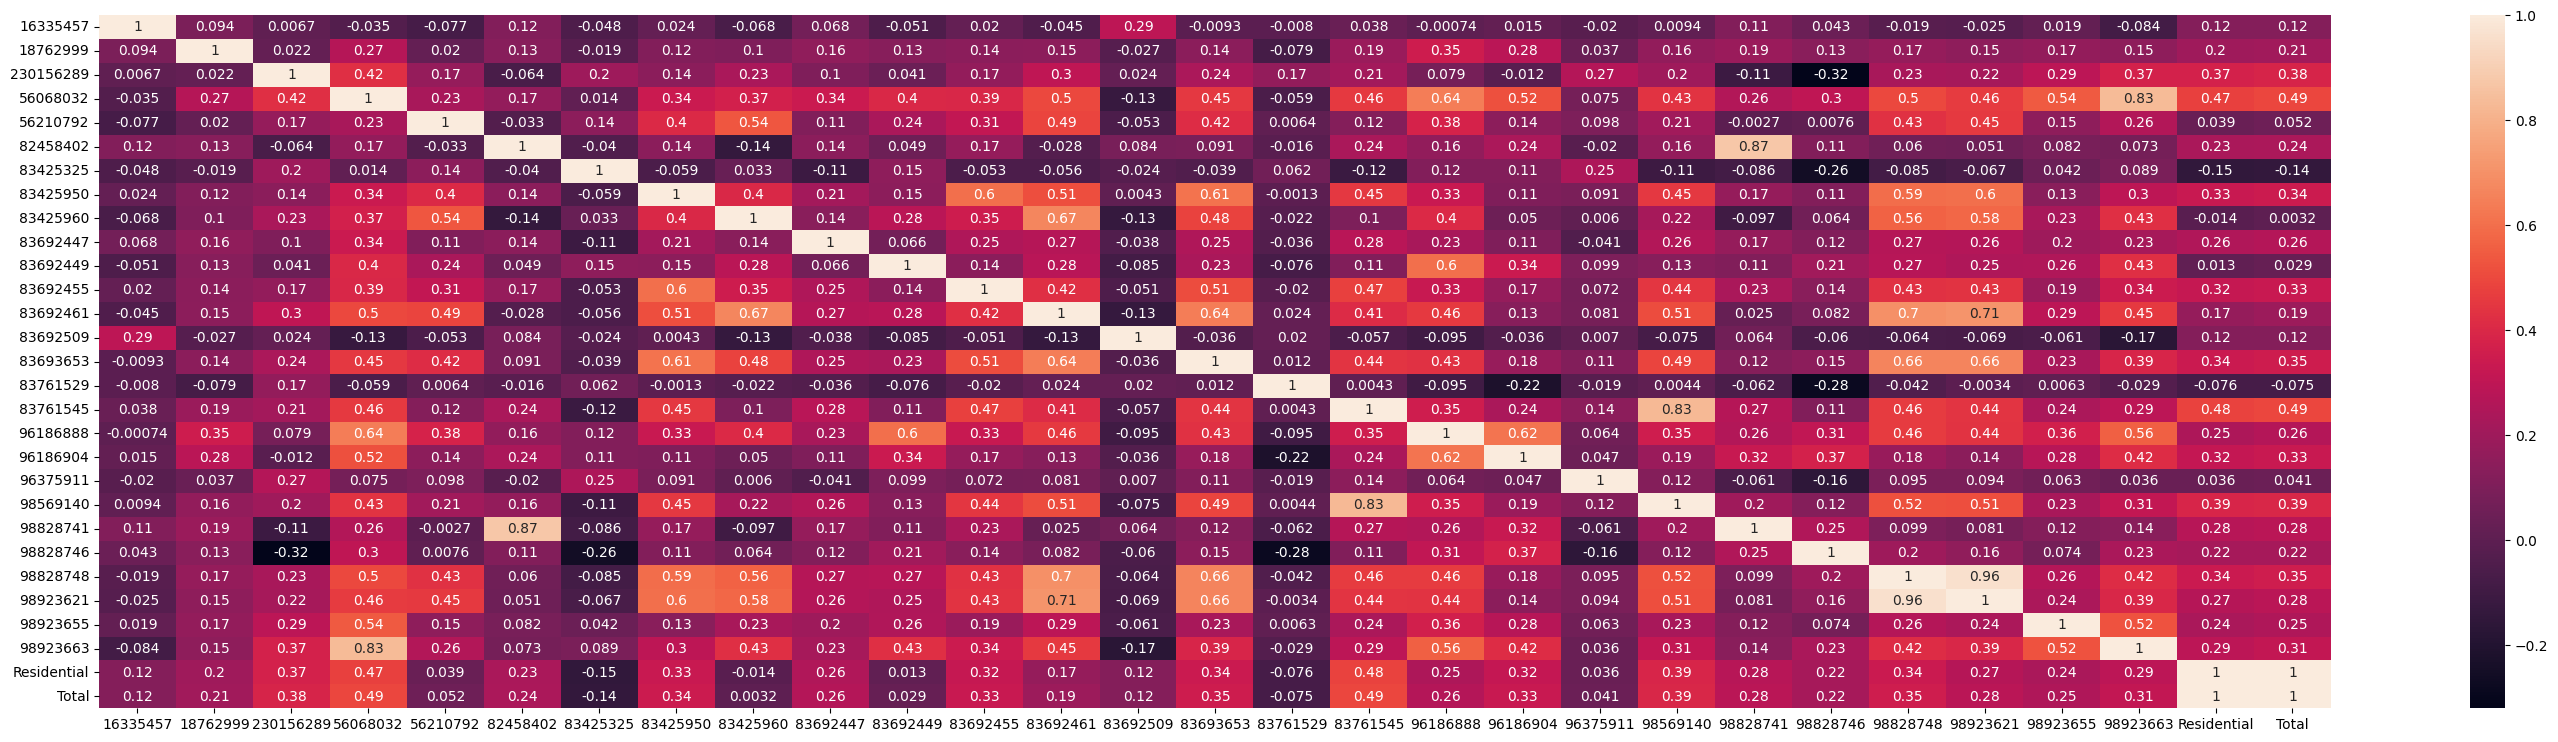

In [ ]:
sns.heatmap(meter.drop(to_drop_high,axis=1).corr(),annot=True)

<ipython-input-40-a35da7bf6500>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(meter.drop(to_drop_low,axis=1).corr(),annot=True)


<Axes: >

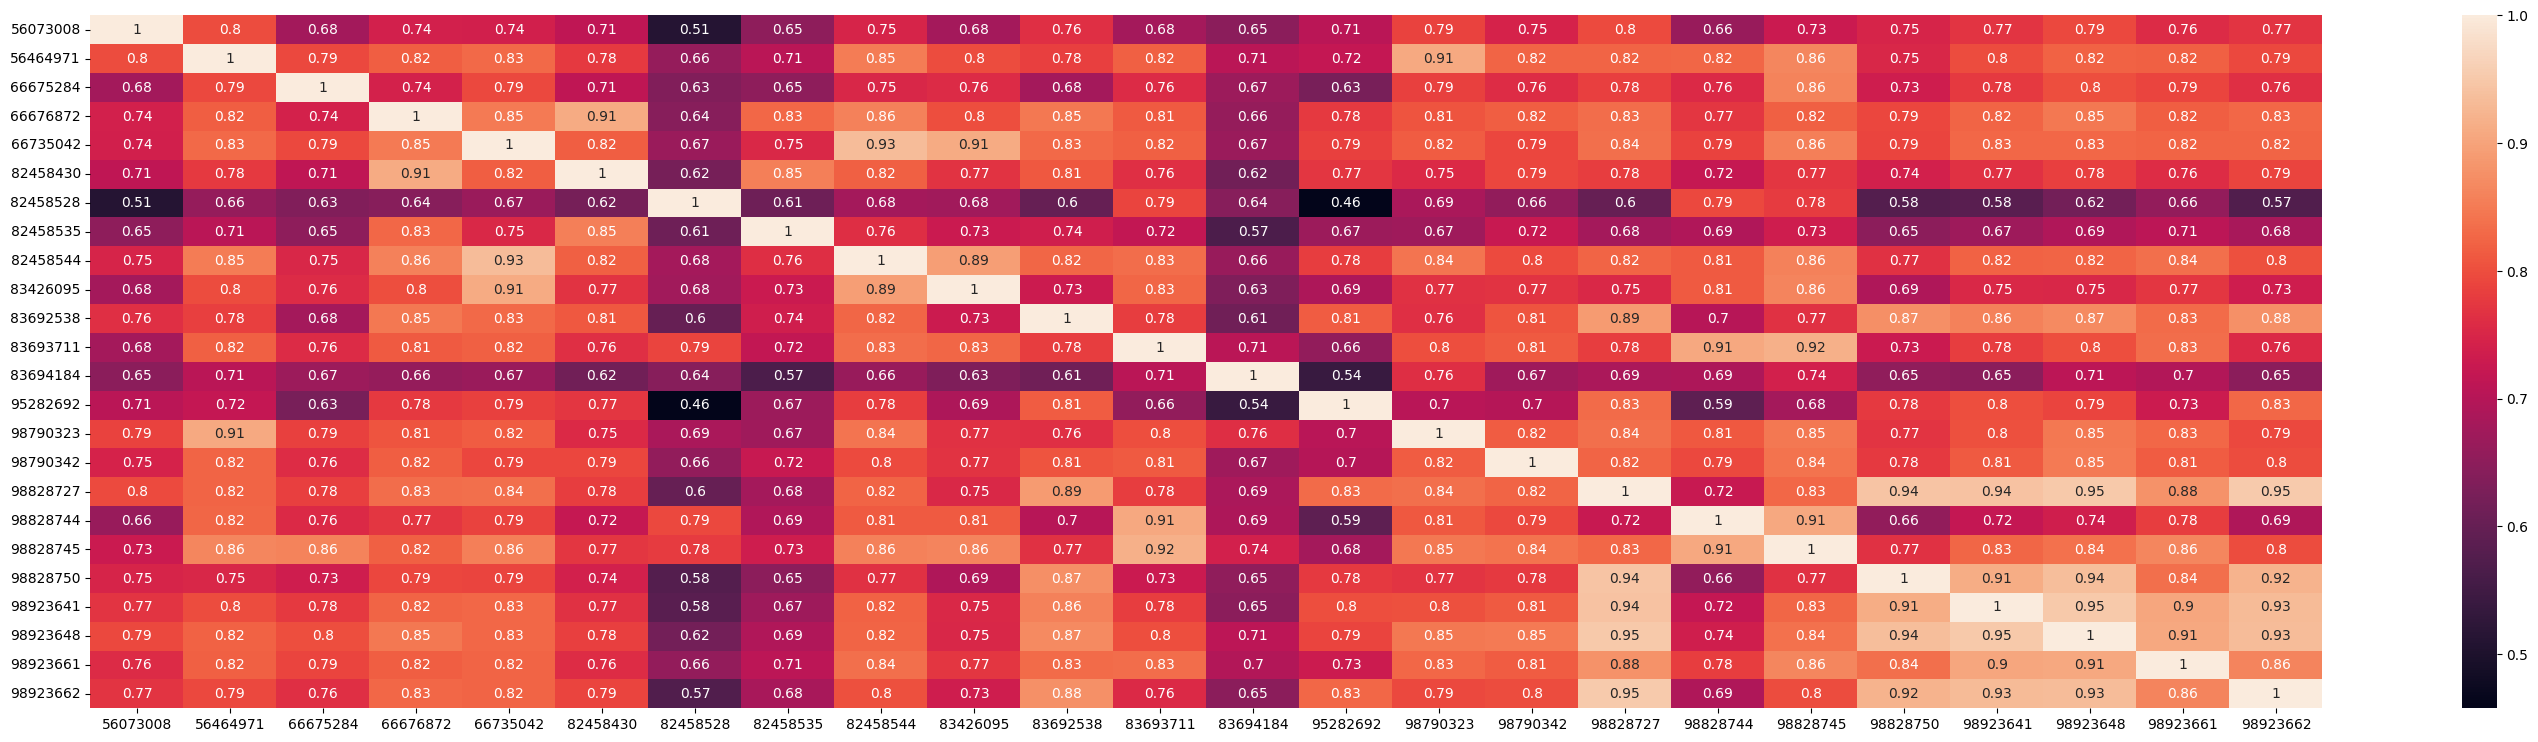

In [ ]:
sns.heatmap(meter.drop(to_drop_low,axis=1).corr(),annot=True)

In [ ]:
describe = meter.drop(["Residential","Total"],axis=1).describe()
describe

,16335457,18762999,230156289,56068032,56073008,56210792,56464971,66675284,66676872,66735042,...,98828746,98828748,98828750,98923621,98923641,98923648,98923655,98923661,98923662,98923663
count,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,...,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000
mean,106.196487,27.805862,22.726842,17.948985,18.340259,583.335092,30.269305,5.514981,28.697807,24.444597,...,47.307801,41.965608,38.845215,50.883839,36.121135,35.573537,38.551861,109.658104,30.899420,28.477258
std,21.881773,3.305747,12.048595,11.872471,12.278769,143.825932,13.617321,3.050563,17.306644,14.463141,...,8.470426,29.882689,35.371575,41.685634,29.927745,31.895834,24.560934,80.797493,28.732621,20.380106
min,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.880000,26.131000,13.500000,9.168000,10.157750,447.240000,20.148000,3.130000,16.380000,13.260000,...,41.936000,5.896000,14.244000,0.324000,15.228000,13.260000,24.982750,44.220000,12.250000,14.736000
50%,104.192000,27.733500,19.650000,13.760000,13.732000,599.640000,26.040000,4.704000,22.920000,21.132000,...,49.472000,58.320000,19.656000,77.332000,24.084000,18.672000,33.408000,81.060000,16.350000,19.656000
75%,106.160000,29.683000,28.260000,24.240000,23.131000,688.080000,35.388000,7.066000,34.400000,30.960000,...,54.064000,69.464000,59.964000,84.704000,49.152000,48.660000,48.454500,154.800000,43.000000,34.896000
max,196.608000,97.248000,90.930000,182.656000,134.527000,1126.560000,94.872000,21.216000,136.640000,88.464000,...,101.512000,100.592000,169.080000,122.060000,162.684000,183.336000,651.320000,389.946000,143.350000,118.452000


In [ ]:
meter_summary = describe.transpose()
meter_summary

,count,mean,std,min,25%,50%,75%,max
16335457,8400.0,106.196487,21.881773,0.640,102.88000,104.1920,106.16000,196.608
18762999,8400.0,27.805862,3.305747,0.000,26.13100,27.7335,29.68300,97.248
230156289,8400.0,22.726842,12.048595,0.000,13.50000,19.6500,28.26000,90.930
56068032,8400.0,17.948985,11.872471,0.000,9.16800,13.7600,24.24000,182.656
56073008,8400.0,18.340259,12.278769,0.000,10.15775,13.7320,23.13100,134.527
56210792,8400.0,583.335092,143.825932,0.000,447.24000,599.6400,688.08000,1126.560
56464971,8400.0,30.269305,13.617321,0.000,20.14800,26.0400,35.38800,94.872
66675284,8400.0,5.514981,3.050563,0.000,3.13000,4.7040,7.06600,21.216
66676872,8400.0,28.697807,17.306644,0.000,16.38000,22.9200,34.40000,136.640
66735042,8400.0,24.444597,14.463141,0.000,13.26000,21.1320,30.96000,88.464


In [ ]:
meter_summary.mean()

count    8400.000000
mean       81.798037
std        31.919449
min         5.031078
25%        59.160828
50%        79.412520
75%       101.563721
max       222.387412
dtype: float64

In [ ]:
dates =pd.date_range('2021-03-21 00:00:00',periods=100, freq = '30T')
display(dates)

DatetimeIndex(['2021-03-21 00:00:00', '2021-03-21 00:30:00',
               '2021-03-21 01:00:00', '2021-03-21 01:30:00',
               '2021-03-21 02:00:00', '2021-03-21 02:30:00',
               '2021-03-21 03:00:00', '2021-03-21 03:30:00',
               '2021-03-21 04:00:00', '2021-03-21 04:30:00',
               '2021-03-21 05:00:00', '2021-03-21 05:30:00',
               '2021-03-21 06:00:00', '2021-03-21 06:30:00',
               '2021-03-21 07:00:00', '2021-03-21 07:30:00',
               '2021-03-21 08:00:00', '2021-03-21 08:30:00',
               '2021-03-21 09:00:00', '2021-03-21 09:30:00',
               '2021-03-21 10:00:00', '2021-03-21 10:30:00',
               '2021-03-21 11:00:00', '2021-03-21 11:30:00',
               '2021-03-21 12:00:00', '2021-03-21 12:30:00',
               '2021-03-21 13:00:00', '2021-03-21 13:30:00',
               '2021-03-21 14:00:00', '2021-03-21 14:30:00',
               '2021-03-21 15:00:00', '2021-03-21 15:30:00',
               '2021-03-